In [5]:
import os
import nltk

from collections import Counter
from nltk.collocations import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/joao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Download dos arquivos

In [12]:
DOWNLOAD_PATH = './propostas_pdf'
if (not os.path.isdir(DOWNLOAD_PATH)):
    print("Downloading propostas...")
    os.makedirs(DOWNLOAD_PATH)
    import urllib.request, json
    with urllib.request.urlopen("http://divulgacandcontas.tse.jus.br/divulga/rest/v1/candidatura/listar/2018/BR/2022802018/1/candidatos") as candidatos_req:
        candidatos_data = json.loads(candidatos_req.read().decode())
        for candidato in candidatos_data['candidatos']:
            with urllib.request.urlopen("http://divulgacandcontas.tse.jus.br/divulga/rest/v1/candidatura/buscar/2018/BR/2022802018/candidato/{}".format(candidato['id'])) as info_req:
                info_data = json.loads(info_req.read().decode())
                for arquivo in info_data['arquivos']:
                    if arquivo['codTipo'] == '5':
                        numero = info_data['numero']
                        nome = info_data['nomeUrna']
                        proposta_pdf_url = 'http://divulgacandcontas.tse.jus.br/' + arquivo['url'] + arquivo['nome']
                        print(f'#{numero} {nome} {proposta_pdf_url}')
                        urllib.request.urlretrieve(proposta_pdf_url, f'{DOWNLOAD_PATH}/{numero}_{nome}.pdf')
else:
    print("Already downloaded. Skipping...")

Already downloaded. Skipping...


# Converter PDFs em texto

Requires `poppler` installed.

In [13]:
! ls -l propostas_pdf | sort -k9

total 23808
-rw-r--r--  1 ferbass  staff   358547 Sep 19 22:19 12_CIRO GOMES.pdf
-rw-r--r--  1 ferbass  staff  2748456 Sep 19 22:19 13_FERNANDO HADDAD.pdf
-rw-r--r--  1 ferbass  staff  1457649 Sep 19 22:21 13_LULA.pdf
-rw-r--r--  1 ferbass  staff   467222 Sep 19 22:20 15_HENRIQUE MEIRELLES.pdf
-rw-r--r--  1 ferbass  staff    65503 Sep 19 22:21 16_VERA.pdf
-rw-r--r--  1 ferbass  staff  1866450 Sep 19 22:20 17_JAIR BOLSONARO.pdf
-rw-r--r--  1 ferbass  staff   828506 Sep 19 22:21 18_MARINA SILVA.pdf
-rw-r--r--  1 ferbass  staff   844039 Sep 19 22:19 19_ALVARO DIAS.pdf
-rw-r--r--  1 ferbass  staff   259782 Sep 19 22:19 27_EYMAEL.pdf
-rw-r--r--  1 ferbass  staff  1136830 Sep 19 22:20 30_JOÃO AMOÊDO.pdf
-rw-r--r--  1 ferbass  staff   616160 Sep 19 22:20 45_GERALDO ALCKMIN.pdf
-rw-r--r--  1 ferbass  staff   861547 Sep 19 22:20 50_GUILHERME BOULOS.pdf
-rw-r--r--  1 ferbass  staff   269657 Sep 19 22:19 51_CABO DACIOLO.pdf
-rw-r--r--  1 ferbass  staff   379086 Sep 19 22:21 54_JOÃO GOULART FILHO.

In [14]:
! mkdir -p propostas_txt
! find ./propostas_pdf -iname '*.pdf' -exec pdftotext {} \;
! mv ./propostas_pdf/*.txt propostas_txt
! ls -la propostas_txt | sort -k9

total 2760
drwxr-xr-x  16 ferbass  staff     512 Sep 20 09:27 .
drwxr-xr-x   9 ferbass  staff     288 Sep 20 09:27 ..
-rw-r--r--   1 ferbass  staff  123378 Sep 20 09:27 12_CIRO GOMES.txt
-rw-r--r--   1 ferbass  staff  215810 Sep 20 09:27 13_FERNANDO HADDAD.txt
-rw-r--r--   1 ferbass  staff  220587 Sep 20 09:27 13_LULA.txt
-rw-r--r--   1 ferbass  staff   24674 Sep 20 09:27 15_HENRIQUE MEIRELLES.txt
-rw-r--r--   1 ferbass  staff   14216 Sep 20 09:27 16_VERA.txt
-rw-r--r--   1 ferbass  staff   58257 Sep 20 09:27 17_JAIR BOLSONARO.txt
-rw-r--r--   1 ferbass  staff  106875 Sep 20 09:27 18_MARINA SILVA.txt
-rw-r--r--   1 ferbass  staff   16618 Sep 20 09:27 19_ALVARO DIAS.txt
-rw-r--r--   1 ferbass  staff   12890 Sep 20 09:27 27_EYMAEL.txt
-rw-r--r--   1 ferbass  staff   28846 Sep 20 09:27 30_JOÃO AMOÊDO.txt
-rw-r--r--   1 ferbass  staff    9192 Sep 20 09:27 45_GERALDO ALCKMIN.txt
-rw-r--r--   1 ferbass  staff  459608 Sep 20 09:27 50_GUILHERME BOULOS.txt
-rw-r--r--   1 ferbass  staff   32370 

# Some basic overview

### number of lines, words and chars

In [15]:
! find ./propostas_txt -iname '*.txt' -exec wc -mlw {} + | sort -k2 -r

   22815  199891 1324375 total
    8325   67007  442897 ./propostas_txt/50_GUILHERME BOULOS.txt
    2759   31295  208048 ./propostas_txt/13_FERNANDO HADDAD.txt
    2522   30934  212907 ./propostas_txt/13_LULA.txt
    2378   18187  118646 ./propostas_txt/12_CIRO GOMES.txt
    1290   15376  103015 ./propostas_txt/18_MARINA SILVA.txt
    2182    8561   56271 ./propostas_txt/17_JAIR BOLSONARO.txt
     636    7569   48675 ./propostas_txt/54_JOÃO GOULART FILHO.txt
     560    4833   31222 ./propostas_txt/51_CABO DACIOLO.txt
     549    4464   27840 ./propostas_txt/30_JOÃO AMOÊDO.txt
     434    3799   23847 ./propostas_txt/15_HENRIQUE MEIRELLES.txt
     393    2454   16015 ./propostas_txt/19_ALVARO DIAS.txt
     178    2204   13789 ./propostas_txt/16_VERA.txt
     276    1853   12391 ./propostas_txt/27_EYMAEL.txt
     333    1355    8812 ./propostas_txt/45_GERALDO ALCKMIN.txt


In [6]:
propostas_arquivos = os.listdir('propostas_txt')
propostas_arquivos.sort()

propostas_arquivos

['12_CIRO GOMES.txt',
 '13_FERNANDO HADDAD.txt',
 '13_LULA.txt',
 '15_HENRIQUE MEIRELLES.txt',
 '16_VERA.txt',
 '17_JAIR BOLSONARO.txt',
 '18_MARINA SILVA.txt',
 '19_ALVARO DIAS.txt',
 '27_EYMAEL.txt',
 '30_JOÃO AMOÊDO.txt',
 '45_GERALDO ALCKMIN.txt',
 '50_GUILHERME BOULOS.txt',
 '51_CABO DACIOLO.txt',
 '54_JOÃO GOULART FILHO.txt']

In [7]:
propostas_textos = {}

for arquivo in propostas_arquivos:
    file_path = 'propostas_txt/' + arquivo
    key = arquivo.split(".")[0]
    
    with open(file_path, 'r') as myfile:
        content=myfile.read().replace('\n',' ')
        propostas_textos[key] = content

# 12_CIRO GOMES


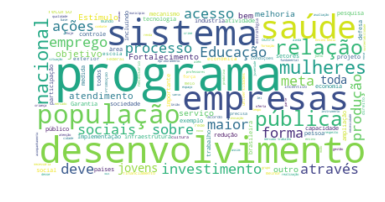

[('agências', 'reguladoras'), ('comum', 'curricular'), ('forças', 'armadas'), ('pacto', 'federativo'), ('u', 'ma'), ('propriedade', 'intelectual'), ('bolsa', 'família'), ('naturais', 'estratégicos'), ('saneamento', 'básico'), ('valor', 'agregado')]
[('recursos', 'naturais', 'estratégicos'), ('nacional', 'comum', 'curricular'), ('nossos', 'recursos', 'naturais'), ('base', 'nacional', 'comum'), ('das', 'forças', 'armadas'), ('por', 'mil', 'habitantes'), ('cada', 'vez', 'mais'), ('américa', 'do', 'sul'), ('com', 'especial', 'destaque'), ('intensivos', 'em', 'conhecimento')]
# 13_FERNANDO HADDAD


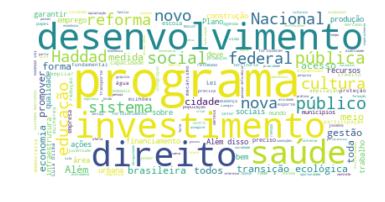

[('especialidades', 'médicas'), ('pt', 'pcdob'), ('satélite', 'geoestacionário'), ('américa', 'latina'), ('ct', '&'), ('r', '$'), ('d', '’'), ('logo', 'após'), ('marcos', 'regulatórios'), ('primeiros', 'meses')]
[('ct', '&', 'i'), ('civis', 'políticos', 'econômicos'), ('ortodoxia', 'fiscal', 'permanente'), ('minha', 'casa', 'minha'), ('internet', 'banda', 'larga'), ('novo', 'pt', 'pcdob'), ('alto', 'valor', 'agregado'), ('casa', 'minha', 'vida'), ('direitos', 'civis', 'políticos'), ('pelas', 'seguintes', 'diretrizes')]
# 13_LULA


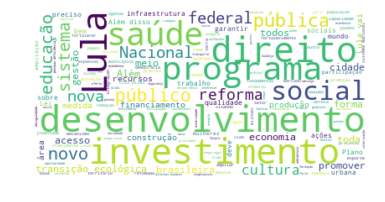

[('r', '$'), ('&', 'i'), ('américa', 'latina'), ('ct', '&'), ('logo', 'após'), ('marcos', 'regulatórios'), ('primeiros', 'meses'), ('civis', 'políticos'), ('regularização', 'fundiária'), ('banda', 'larga')]
[('ct', '&', 'i'), ('civis', 'políticos', 'econômicos'), ('minha', 'casa', 'minha'), ('ortodoxia', 'fiscal', 'permanente'), ('alto', 'valor', 'agregado'), ('casa', 'minha', 'vida'), ('direitos', 'civis', 'políticos'), ('políticos', 'econômicos', 'sociais'), ('povo', 'tem', 'pressa'), ('sociedade', 'civil', 'organizada')]
# 15_HENRIQUE MEIRELLES


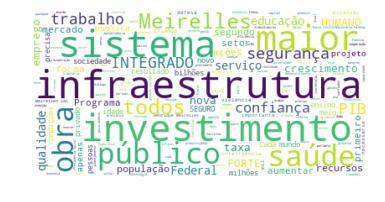

[('banco', 'central'), ('penitenciário', 'nacional'), ('r', '$'), ('previdência', 'social'), ('política', 'externa'), ('isso', 'precisa'), ('sistema', 'penitenciário'), ('65', 'anos'), ('serviços', 'públicos'), ('segurança', 'pública')]
[('sistema', 'penitenciário', 'nacional'), ('ministério', 'da', 'fazenda'), ('uma', 'política', 'externa'), ('governo', 'meirelles', 'vai'), ('mão', 'de', 'obra'), ('brasil', 'mais', 'forte'), ('brasil', 'mais', 'seguro'), ('mercado', 'de', 'trabalho'), ('brasil', 'mais', 'integrado'), ('brasil', 'mais', 'humano')]
# 16_VERA


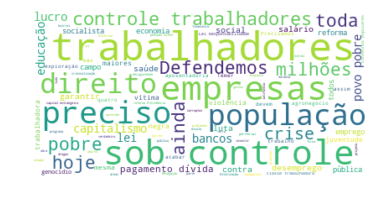

[('capital', 'estrangeiro'), ('conselhos', 'populares'), ('classe', 'trabalhadora'), ('nas', 'mãos'), ('assim', 'como'), ('no', 'campo'), ('povo', 'pobre'), ('um', 'programa'), ('um', 'verdadeiro'), ('acabar', 'com')]
[('governos', 'do', 'pt'), ('reforma', 'da', 'previdência'), ('pagamento', 'da', 'dívida'), ('enquanto', 'os', 'grandes'), ('lei', 'de', 'responsabilidade'), ('do', 'povo', 'pobre'), ('controle', 'dos', 'trabalhadores'), ('sob', 'o', 'controle'), ('a', 'juventude', 'pobre'), ('juventude', 'pobre', 'e')]
# 17_JAIR BOLSONARO


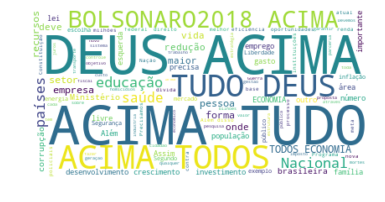

[('jair', 'bolsonaro'), ('banco', 'central'), ('contas', 'públicas'), ('novas', 'tecnologias'), ('propriedade', 'privada'), ('ativos', 'públicos'), ('comércio', 'internacional'), ('longo', 'prazo'), ('forças', 'armadas'), ('bolsa', 'família')]
[('das', 'contas', 'públicas'), ('combate', 'à', 'corrupção'), ('coréia', 'do', 'sul'), ('as', 'forças', 'armadas'), ('caminho', 'da', 'prosperidade'), ('homicídios', 'por', 'ano'), ('privatizações', 'e', 'concessões'), ('petróleo', 'e', 'gás'), ('carteira', 'de', 'trabalho'), ('segurança', 'e', 'combate')]
# 18_MARINA SILVA


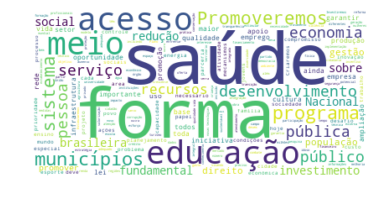

[('primeira', 'infância'), ('urbanismo', 'colaborativo'), ('agências', 'reguladoras'), ('comum', 'curricular'), ('crime', 'organizado'), ('efeito', 'estufa'), ('diz', 'respeito'), ('medicamentos', 'genéricos'), ('duas', 'vezes'), ('&', 'i')]
[('justo', 'ético', 'próspero'), ('ct', '&', 'i'), ('nacional', 'comum', 'curricular'), ('base', 'nacional', 'comum'), ('ao', 'mesmo', 'tempo'), ('cada', 'vez', 'mais'), ('programas', 'voltados', 'à'), ('o', 'cadastro', 'único'), ('mão', 'de', 'obra'), ('a', 'serem', 'enfrentados')]
# 19_ALVARO DIAS


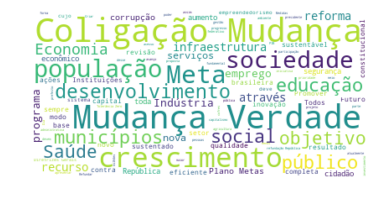

[('ou', 'seja'), ('tolerância', 'zero'), ('serviços', 'públicos'), ('diretrizes', 'gerais'), ('devem', 'ser'), ('todas', 'as'), ('19', 'metas'), ('crescimento', 'sustentado'), ('coligação', 'mudança'), ('os', 'municípios')]
[('emprego', 'para', 'todos'), ('refundação', 'da', 'república'), ('plano', 'de', '19'), ('coligação', 'mudança', 'de'), ('mudança', 'de', 'verdade'), ('de', '19', 'metas'), ('da', 'coligação', 'mudança')]
# 27_EYMAEL


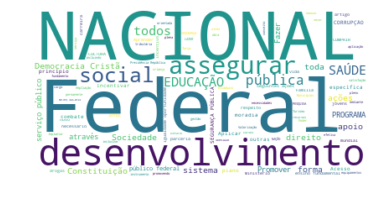

[('metas', 'sociais'), ('democracia', 'cristã'), ('ensino', 'fundamental'), ('serviço', 'público'), ('entre', 'outras'), ('segurança', 'pública'), ('políticas', 'públicas'), ('seguintes', 'ações'), ('todas', 'as'), ('plano', 'nacional')]
[('presidência', 'da', 'república'), ('serviço', 'público', 'federal'), ('ações', 'entre', 'outras'), ('seguintes', 'ações', 'entre'), ('da', 'democracia', 'cristã'), ('igualdade', 'de', 'oportunidade'), ('do', 'serviço', 'público'), ('do', 'governo', 'federal'), ('da', 'constituição', 'federal'), ('de', 'segurança', 'pública')]
# 30_JOÃO AMOÊDO


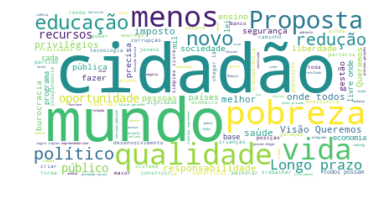

[('cidadania', 'plena'), ('acordos', 'comerciais'), ('carga', 'tributária'), ('contas', 'públicas'), ('mortalidade', 'infantil'), ('proteção', 'social'), ('bolsa', 'família'), ('chegar', 'lá'), ('previdência', 'justa'), ('simpli', 'cação')]
[('possam', 'chegar', 'lá'), ('longo', 'prazo', 'reduzir'), ('as', 'futuras', 'gerações'), ('todos', 'possam', 'chegar'), ('as', 'próximas', 'gerações'), ('a', 'cidadania', 'plena'), ('onde', 'todos', 'possam'), ('livre', 'onde', 'todos'), ('princípios', 'e', 'valores'), ('chegar', 'lá', 'um')]
# 45_GERALDO ALCKMIN


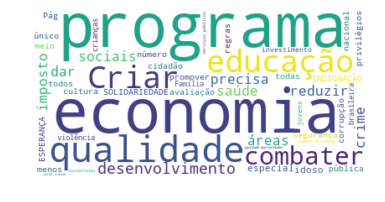

[('serviços', 'públicos'), ('todas', 'as'), ('em', 'áreas'), ('brasil', 'precisa'), ('da', 'esperança'), ('da', 'indignação'), ('da', 'solidariedade'), ('do', 'estado'), ('voltar', 'a'), ('o', 'número')]
[('igualdade', 'de', 'oportunidades'), ('voltar', 'a', 'crescer'), ('brasil', 'da', 'esperança'), ('brasil', 'da', 'indignação'), ('brasil', 'da', 'solidariedade'), ('o', 'brasil', 'precisa'), ('o', 'número', 'de'), ('o', 'brasil', 'da')]
# 50_GUILHERME BOULOS


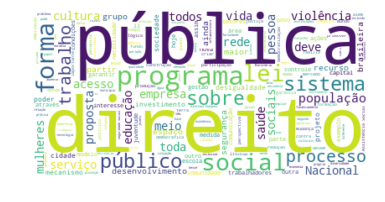

[('fernando', 'henrique'), ('henrique', 'cardoso'), ('joão', 'nery'), ('energias', 'renováveis'), ('aterros', 'sanitários'), ('dilma', 'rousseff'), ('jean', 'wyllys'), ('nações', 'unidas'), ('wyllys', 'psol-rj'), ('sementes', 'transgênicas')]
[('fernando', 'henrique', 'cardoso'), ('jean', 'wyllys', 'psol-rj'), ('100', 'mil', 'habitantes'), ('lei', 'joão', 'nery'), ('diretrizes', 'curriculares', 'nacionais'), ('constitucional', 'nº', '95'), ('per', 'capita', 'familiar'), ('emenda', 'constitucional', 'nº'), ('½', 'salário', 'mínimo'), ('vem', 'sendo', 'conduzido')]
# 51_CABO DACIOLO


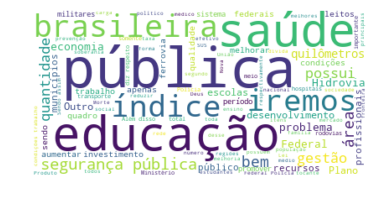

[('r', '$'), ('100.000', 'habitantes'), ('forças', 'armadas'), ('interno', 'bruto'), ('habitantes', 'fatores'), ('alguns', 'indicadores'), ('grandes', 'corporações'), ('trechos', 'navegáveis'), ('evasão', 'escolar'), ('produto', 'interno')]
[('produto', 'interno', 'bruto'), ('100.000', 'habitantes', 'fatores'), ('por', '100.000', 'habitantes'), ('acessibilidade', 'aos', 'alunos'), ('aos', 'alunos', 'portadores'), ('polícia', 'rodoviária', 'federal'), ('diz', 'respeito', 'à'), ('estadual', 'e', 'municipal'), ('do', 'produto', 'interno'), ('em', 'sua', 'maioria')]
# 54_JOÃO GOULART FILHO


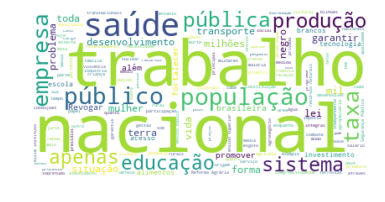

[('resíduos', 'sólidos'), ('forças', 'armadas'), ('joão', 'goulart'), ('populações', 'urbanas'), ('crime', 'organizado'), ('facções', 'criminosas'), ('produtos', 'agropecuários'), ('nossas', 'forças'), ('escolas', 'particulares'), ('licença', 'maternidade')]
[('nossas', 'forças', 'armadas'), ('as', 'populações', 'urbanas'), ('cada', 'vez', 'mais'), ('ao', 'mesmo', 'tempo'), ('nosso', 'compromisso', 'é'), ('por', '100', 'mil'), ('comunidades', 'da', 'periferia'), ('de', 'resíduos', 'sólidos'), ('realizar', 'uma', 'reforma'), ('aumento', 'da', 'produtividade')]


In [8]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

for candidato, proposta in propostas_textos.items():
    print("# " + candidato)
    tokens = word_tokenize(proposta.lower())
    punctuations = ['(',')',';',':','[',']',',','.','!','%','•','n','\x07','-','–','“','”','...']
    
    stop_words = stopwords.words('portuguese')
    custom_stop_words = open('stopwords.txt', 'r').read().splitlines()
    stop_words += custom_stop_words
    keywords = [word for word in tokens if not word in stop_words and not word in punctuations]

#     counter = Counter(keywords)
#     print(counter.most_common(20))
    wc = WordCloud(background_color="white",stopwords=stop_words)
    wc.generate_from_text(proposta)

    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    
    # find n-grams but don't exclude stop words
    keywords_nopunct = [word for word in tokens if not word in punctuations]

    # bigram
    finder = BigramCollocationFinder.from_words(keywords_nopunct)
    finder.apply_freq_filter(3)
    print(finder.nbest(bigram_measures.pmi, 10))

    # trigram
    finder = TrigramCollocationFinder.from_words(keywords_nopunct)
    finder.apply_freq_filter(3)
    print(finder.nbest(trigram_measures.pmi, 10))
